**Sprint 1: Exploratory Data Analysis**

In [1]:
#Dependencies
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
import pickle
print(os.listdir("../data"))

['site_feature_names.npy', 'X_train_baseline.npz', 'baseline_logreg_submission.csv', 'y_train.npy', 'best_params_logreg_submission.csv', 'X_test_engineered.npz', 'site_dic.pkl', 'test_sessions.csv', 'X_train_engineered.npz', 'sample_submission.csv', 'best_params_xgb_submission.csv', 'X_test_baseline.npz', 'feature_selection_logreg_submission.csv', 'train_sessions.csv', 'best_params_oversampled_logreg_submission.csv']


Load in datasets

In [2]:
PATH_TO_DATA = ('../data')
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'), index_col='session_id')
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_sessions.csv'), index_col='session_id')

target = train_df['target']
train_df = train_df.drop(['target'], axis = 1)
full_df = pd.concat([train_df, test_df])

**Dataset Structure**

Examine the structure of the dataset

In [3]:
print(train_df.shape)
print(test_df.shape)

(253561, 20)
(82797, 20)


In [4]:
train_df.head(10)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,3846.0,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,39.0,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,782.0,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,178.0,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11
6,570,2014-03-18 15:18:31,21.0,2014-03-18 15:18:39,570.0,2014-03-18 15:23:02,21.0,2014-03-18 15:23:43,21.0,2014-03-18 15:29:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,803,2014-02-13 16:45:35,23.0,2014-02-13 16:45:35,5956.0,2014-02-13 16:45:35,17513.0,2014-02-13 16:45:35,37.0,2014-02-13 16:46:05,21.0,2014-02-13 16:47:14,803.0,2014-02-13 16:47:14,17514.0,2014-02-13 16:47:15,17514.0,2014-02-13 16:47:16,17514.0,2014-02-13 16:47:17
8,22,2013-04-12 10:27:26,21.0,2013-04-12 10:27:26,29.0,2013-04-12 10:27:28,5041.0,2013-04-12 10:27:29,14422.0,2013-04-12 10:27:29,23.0,2013-04-12 10:27:29,21.0,2013-04-12 10:27:29,5041.0,2013-04-12 10:27:31,14421.0,2013-04-12 10:27:31,14421.0,2013-04-12 10:27:32
9,668,2014-03-17 16:23:08,940.0,2014-03-17 16:23:35,942.0,2014-03-17 16:23:35,941.0,2014-03-17 16:23:35,941.0,2014-03-17 16:23:36,942.0,2014-03-17 16:23:36,940.0,2014-03-17 16:23:36,23.0,2014-03-17 16:23:52,21.0,2014-03-17 16:23:52,22.0,2014-03-17 16:23:53


The dataset has 20 columns, including:
* site1 - id of the first visited website in the session
* time1 - time visiting the first website in the session
* site2 - id of the second visited website in the session
* time2 - time visiting the second website in the session\
...
* site10 - id of the tenth visited website in the session
* time10 - time visiting the tenth website in the session

Sessions are atmost 30-minute-long and/or 10 websites visited. ID are mapped to URLs in an external dictionary (site_dic.pkl).

**Visualize NaNs**

We see some missing values. Let's check the percentage of NaNs.

In [5]:
nan_columns = []
nan_values = []

for column in full_df.columns:
    nan_columns.append(column)
    percentage = round(full_df[column].isnull().sum()/full_df[column].count()*100, 2)
    nan_values.append(f"{percentage}%")

In [6]:
pnulls_and_cols = pd.DataFrame({
    'Columns': nan_columns,
    'Percentage of nulls': nan_values,
})

In [7]:
pnulls_and_cols

,Columns,Percentage of nulls
0,site1,0.0%
1,time1,0.0%
2,site2,1.49%
3,time2,1.49%
4,site3,2.86%
5,time3,2.86%
6,site4,3.97%
7,time4,3.97%
8,site5,5.06%
9,time5,5.06%


<Axes: title={'center': 'Percentage of nulls in each column'}, xlabel='Percentage of nulls', ylabel='Columns'>

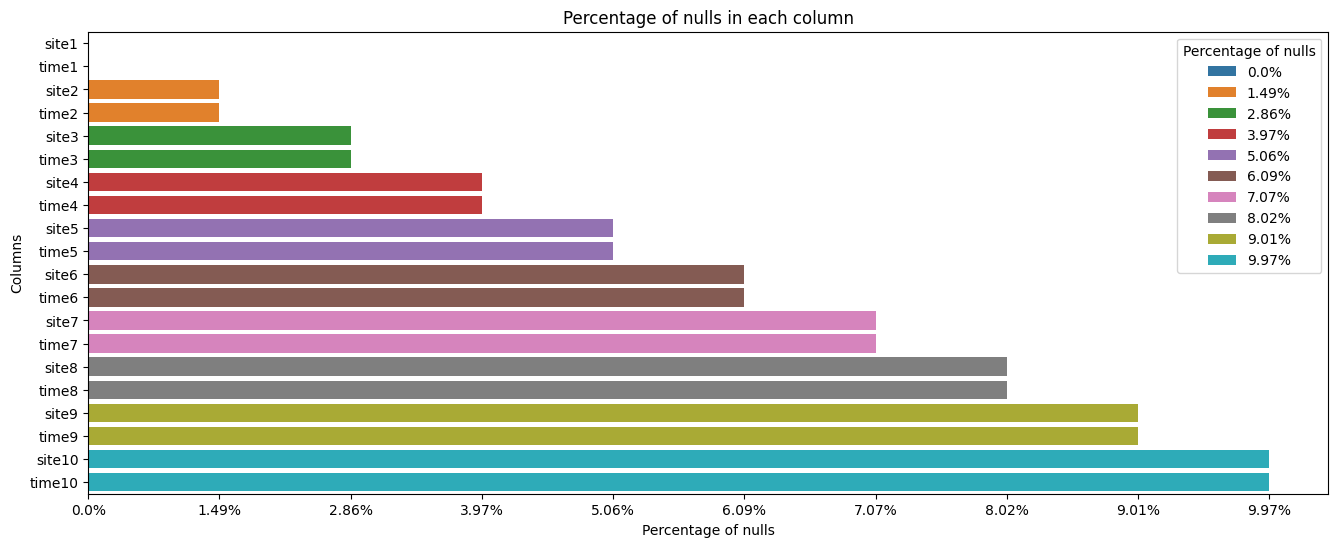

In [8]:
plt.figure(figsize=(16, 6))
plt.title('Percentage of nulls in each column')
sns.barplot(
    data=pnulls_and_cols,
    y='Columns',
    x='Percentage of nulls',
    hue = 'Percentage of nulls',
    orient='h'
)

In [9]:
sites_cols = ['site%s' % i for i in range(1, 11)]
full_df[sites_cols] = full_df[sites_cols].fillna(0).astype('int')

In [10]:
#Check that the transformation was applied
after_nan_values = []

for column in full_df.columns:
    percentage = round(full_df[column].isnull().sum()/full_df[column].count()*100, 2)
    after_nan_values.append(f"{percentage}%")

print(after_nan_values)

['0.0%', '0.0%', '0.0%', '1.49%', '0.0%', '2.86%', '0.0%', '3.97%', '0.0%', '5.06%', '0.0%', '6.09%', '0.0%', '7.07%', '0.0%', '8.02%', '0.0%', '9.01%', '0.0%', '9.97%']


We see that the percentage of nulls in site id and the corresponding start timestamp are equal, and 
all sessions are labelled (no nulls in the target column), suggesting that the dataset is complete. The nulls are a result of 30-minute-long sessions limit. 

**IDs to URLs**

Load the URLs

In [11]:
# Load websites dictionary
with open(r"../data/site_dic.pkl", "rb") as input_file:
    site_dict = pickle.load(input_file)

# Create dataframe for the dictionary
sites_dict = pd.DataFrame({
    'id': list(site_dict.values()),
    'site': list(site_dict.keys())
}).set_index('id')
print(u'Websites total:', sites_dict.shape[0])

Websites total: 48371


In [12]:
sites_dict.sort_values(['id'])

,site
id,
1,fpdownload2.macromedia.com
2,hotmail.fr
3,login.live.com
4,mail.live.com
5,dub122.mail.live.com
...,...
48367,www.mathjax.org
48368,lemonde-educ.blog.lemonde.fr
48369,evcs-crl.ws.symantec.com


In [13]:
# Replace all site ids with URLs from sites_dict
sites_cols = ['site%s' % i for i in range(1,11)]
for site_col in sites_cols:
    full_df[site_col] = full_df[site_col].map(sites_dict['site'])

In [14]:
full_df.head(10)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,rr.office.microsoft.com,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,maps.google.com,2014-02-22 11:19:50,mts0.google.com,2014-02-22 11:19:50,khms0.google.com,2014-02-22 11:19:51,mts0.google.com,2014-02-22 11:19:51,mts1.google.com,2014-02-22 11:19:51,khms1.google.com,2014-02-22 11:19:51,khms0.google.com,2014-02-22 11:19:52,khms1.google.com,2014-02-22 11:19:52,193.164.197.30,2014-02-22 11:20:15,193.164.196.60,2014-02-22 11:20:16
3,cbk1.googleapis.com,2013-12-16 16:40:17,accounts.google.com,2013-12-16 16:40:18,cbk0.googleapis.com,2013-12-16 16:40:19,cbk1.googleapis.com,2013-12-16 16:40:19,twitter.com,2013-12-16 16:40:19,accounts.google.com,2013-12-16 16:40:19,cbk0.googleapis.com,2013-12-16 16:40:20,cbk0.googleapis.com,2013-12-16 16:40:21,cbk0.googleapis.com,2013-12-16 16:40:22,cbk0.googleapis.com,2013-12-16 16:40:24
4,annotathon.org,2014-03-28 10:52:12,annotathon.org,2014-03-28 10:52:42,annotathon.org,2014-03-28 10:53:12,annotathon.org,2014-03-28 10:53:42,annotathon.org,2014-03-28 10:54:12,annotathon.org,2014-03-28 10:54:42,annotathon.org,2014-03-28 10:55:12,annotathon.org,2014-03-28 10:55:42,annotathon.org,2014-03-28 10:56:12,annotathon.org,2014-03-28 10:56:42
5,apis.google.com,2014-02-28 10:53:05,fr.wikipedia.org,2014-02-28 10:55:22,bits.wikimedia.org,2014-02-28 10:55:22,meta.wikimedia.org,2014-02-28 10:55:23,fr.wikipedia.org,2014-02-28 10:55:23,meta.wikimedia.org,2014-02-28 10:55:59,bits.wikimedia.org,2014-02-28 10:55:59,fr.wikipedia.org,2014-02-28 10:55:59,fr.wikipedia.org,2014-02-28 10:57:06,meta.wikimedia.org,2014-02-28 10:57:11
6,plus.google.com,2014-03-18 15:18:31,www.google.fr,2014-03-18 15:18:39,plus.google.com,2014-03-18 15:23:02,www.google.fr,2014-03-18 15:23:43,www.google.fr,2014-03-18 15:29:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,translate.google.com,2014-02-13 16:45:35,www.google.com,2014-02-13 16:45:35,search.twitter.com,2014-02-13 16:45:35,html5doctor.com,2014-02-13 16:45:35,twitter.com,2014-02-13 16:46:05,www.google.fr,2014-02-13 16:47:14,translate.google.com,2014-02-13 16:47:14,www.designvegetal.com,2014-02-13 16:47:15,www.designvegetal.com,2014-02-13 16:47:16,www.designvegetal.com,2014-02-13 16:47:17
8,apis.google.com,2013-04-12 10:27:26,www.google.fr,2013-04-12 10:27:26,www.facebook.com,2013-04-12 10:27:28,i1.ztat.net,2013-04-12 10:27:29,track.zalando.fr,2013-04-12 10:27:29,www.google.com,2013-04-12 10:27:29,www.google.fr,2013-04-12 10:27:29,i1.ztat.net,2013-04-12 10:27:31,i2.ztat.net,2013-04-12 10:27:31,i2.ztat.net,2013-04-12 10:27:32
9,cbks0.google.com,2014-03-17 16:23:08,maps.google.fr,2014-03-17 16:23:35,mts1.google.com,2014-03-17 16:23:35,mts0.google.com,2014-03-17 16:23:35,mts0.google.com,2014-03-17 16:23:36,mts1.google.com,2014-03-17 16:23:36,maps.google.fr,2014-03-17 16:23:36,www.google.com,2014-03-17 16:23:52,www.google.fr,2014-03-17 16:23:52,apis.google.com,2014-03-17 16:23:53


**Analyse the distribution of site_ids, timestamps and session durations**

In [15]:
times_cols = ['time%s' % i for i in range(1,11)]
full_df[times_cols] = full_df[times_cols].apply(pd.to_datetime)
full_df.head(10)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,rr.office.microsoft.com,2014-02-20 10:02:45,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT
2,maps.google.com,2014-02-22 11:19:50,mts0.google.com,2014-02-22 11:19:50,khms0.google.com,2014-02-22 11:19:51,mts0.google.com,2014-02-22 11:19:51,mts1.google.com,2014-02-22 11:19:51,khms1.google.com,2014-02-22 11:19:51,khms0.google.com,2014-02-22 11:19:52,khms1.google.com,2014-02-22 11:19:52,193.164.197.30,2014-02-22 11:20:15,193.164.196.60,2014-02-22 11:20:16
3,cbk1.googleapis.com,2013-12-16 16:40:17,accounts.google.com,2013-12-16 16:40:18,cbk0.googleapis.com,2013-12-16 16:40:19,cbk1.googleapis.com,2013-12-16 16:40:19,twitter.com,2013-12-16 16:40:19,accounts.google.com,2013-12-16 16:40:19,cbk0.googleapis.com,2013-12-16 16:40:20,cbk0.googleapis.com,2013-12-16 16:40:21,cbk0.googleapis.com,2013-12-16 16:40:22,cbk0.googleapis.com,2013-12-16 16:40:24
4,annotathon.org,2014-03-28 10:52:12,annotathon.org,2014-03-28 10:52:42,annotathon.org,2014-03-28 10:53:12,annotathon.org,2014-03-28 10:53:42,annotathon.org,2014-03-28 10:54:12,annotathon.org,2014-03-28 10:54:42,annotathon.org,2014-03-28 10:55:12,annotathon.org,2014-03-28 10:55:42,annotathon.org,2014-03-28 10:56:12,annotathon.org,2014-03-28 10:56:42
5,apis.google.com,2014-02-28 10:53:05,fr.wikipedia.org,2014-02-28 10:55:22,bits.wikimedia.org,2014-02-28 10:55:22,meta.wikimedia.org,2014-02-28 10:55:23,fr.wikipedia.org,2014-02-28 10:55:23,meta.wikimedia.org,2014-02-28 10:55:59,bits.wikimedia.org,2014-02-28 10:55:59,fr.wikipedia.org,2014-02-28 10:55:59,fr.wikipedia.org,2014-02-28 10:57:06,meta.wikimedia.org,2014-02-28 10:57:11
6,plus.google.com,2014-03-18 15:18:31,www.google.fr,2014-03-18 15:18:39,plus.google.com,2014-03-18 15:23:02,www.google.fr,2014-03-18 15:23:43,www.google.fr,2014-03-18 15:29:57,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT
7,translate.google.com,2014-02-13 16:45:35,www.google.com,2014-02-13 16:45:35,search.twitter.com,2014-02-13 16:45:35,html5doctor.com,2014-02-13 16:45:35,twitter.com,2014-02-13 16:46:05,www.google.fr,2014-02-13 16:47:14,translate.google.com,2014-02-13 16:47:14,www.designvegetal.com,2014-02-13 16:47:15,www.designvegetal.com,2014-02-13 16:47:16,www.designvegetal.com,2014-02-13 16:47:17
8,apis.google.com,2013-04-12 10:27:26,www.google.fr,2013-04-12 10:27:26,www.facebook.com,2013-04-12 10:27:28,i1.ztat.net,2013-04-12 10:27:29,track.zalando.fr,2013-04-12 10:27:29,www.google.com,2013-04-12 10:27:29,www.google.fr,2013-04-12 10:27:29,i1.ztat.net,2013-04-12 10:27:31,i2.ztat.net,2013-04-12 10:27:31,i2.ztat.net,2013-04-12 10:27:32
9,cbks0.google.com,2014-03-17 16:23:08,maps.google.fr,2014-03-17 16:23:35,mts1.google.com,2014-03-17 16:23:35,mts0.google.com,2014-03-17 16:23:35,mts0.google.com,2014-03-17 16:23:36,mts1.google.com,2014-03-17 16:23:36,maps.google.fr,2014-03-17 16:23:36,www.google.com,2014-03-17 16:23:52,www.google.fr,2014-03-17 16:23:52,apis.google.com,2014-03-17 16:23:53


In [16]:
#Duration in minutes: (Max timestamp - min timestamps) / 60 rounded to 2 decimal places.
full_df['duration'] = round((full_df[times_cols].max(axis = 1) - full_df[times_cols].min(axis = 1)) / np.timedelta64(1, 's') / 60, 2)

In [17]:
full_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,duration
session_id,,,,,,,,,,,,,,,,,,,,,
1,rr.office.microsoft.com,2014-02-20 10:02:45,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0.00
2,maps.google.com,2014-02-22 11:19:50,mts0.google.com,2014-02-22 11:19:50,khms0.google.com,2014-02-22 11:19:51,mts0.google.com,2014-02-22 11:19:51,mts1.google.com,2014-02-22 11:19:51,...,2014-02-22 11:19:51,khms0.google.com,2014-02-22 11:19:52,khms1.google.com,2014-02-22 11:19:52,193.164.197.30,2014-02-22 11:20:15,193.164.196.60,2014-02-22 11:20:16,0.43
3,cbk1.googleapis.com,2013-12-16 16:40:17,accounts.google.com,2013-12-16 16:40:18,cbk0.googleapis.com,2013-12-16 16:40:19,cbk1.googleapis.com,2013-12-16 16:40:19,twitter.com,2013-12-16 16:40:19,...,2013-12-16 16:40:19,cbk0.googleapis.com,2013-12-16 16:40:20,cbk0.googleapis.com,2013-12-16 16:40:21,cbk0.googleapis.com,2013-12-16 16:40:22,cbk0.googleapis.com,2013-12-16 16:40:24,0.12
4,annotathon.org,2014-03-28 10:52:12,annotathon.org,2014-03-28 10:52:42,annotathon.org,2014-03-28 10:53:12,annotathon.org,2014-03-28 10:53:42,annotathon.org,2014-03-28 10:54:12,...,2014-03-28 10:54:42,annotathon.org,2014-03-28 10:55:12,annotathon.org,2014-03-28 10:55:42,annotathon.org,2014-03-28 10:56:12,annotathon.org,2014-03-28 10:56:42,4.50
5,apis.google.com,2014-02-28 10:53:05,fr.wikipedia.org,2014-02-28 10:55:22,bits.wikimedia.org,2014-02-28 10:55:22,meta.wikimedia.org,2014-02-28 10:55:23,fr.wikipedia.org,2014-02-28 10:55:23,...,2014-02-28 10:55:59,bits.wikimedia.org,2014-02-28 10:55:59,fr.wikipedia.org,2014-02-28 10:55:59,fr.wikipedia.org,2014-02-28 10:57:06,meta.wikimedia.org,2014-02-28 10:57:11,4.10


In [18]:
print(full_df['time1'].nunique(), full_df.shape)

313976 (336358, 21)


We see some duplicates in the start time of the session. This is unlikely to be caused by duplicate data, but different sessions started by different people at the same time.

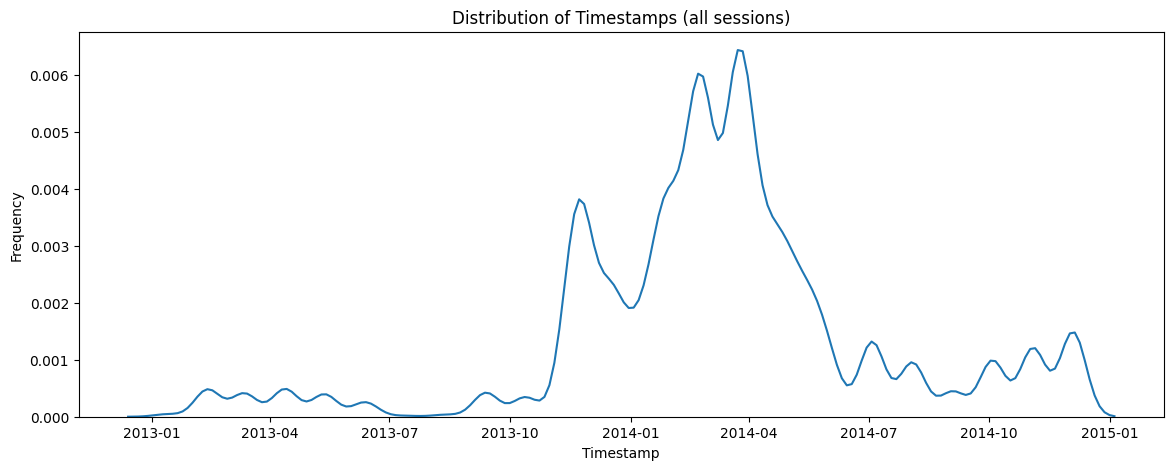

In [19]:
#We only count the first timestamp to get the accurate number of sessions.
all_times = pd.to_datetime(full_df[times_cols].min(axis = 1).values)
all_times = all_times.dropna()
plt.figure(figsize=(14, 5))
sns.kdeplot(all_times)
plt.title('Distribution of Timestamps (all sessions)')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

Most sessions occus within the period between 2013-11 to 2014-06. From 2013-01 to 2013-11 and 2014-06 to 2014-12, there are periods of inactivity in between peaks in activity. 

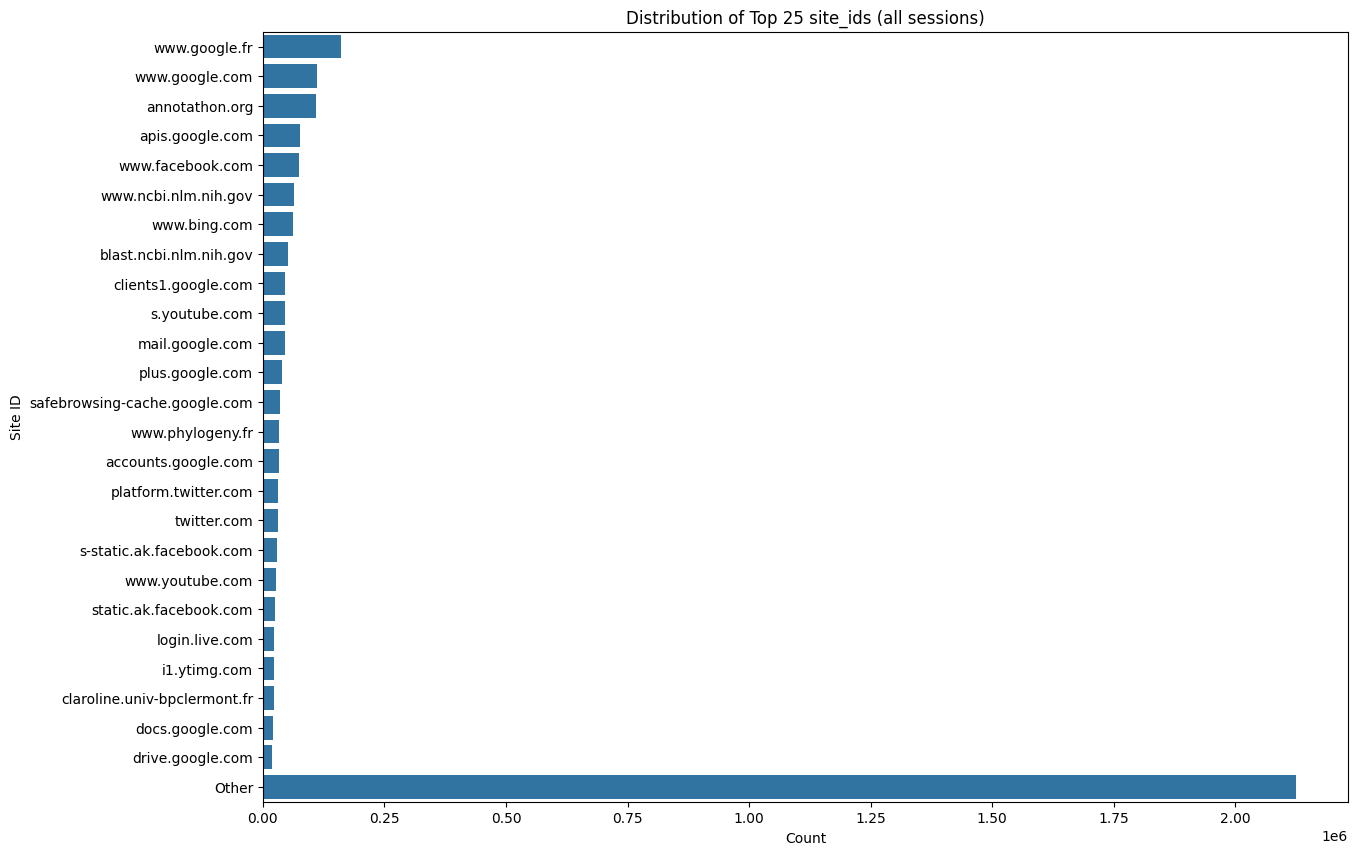

In [20]:
all_sites = pd.Series(full_df[sites_cols].to_numpy().flatten())
top_n = 25
top_sites = all_sites.value_counts().nlargest(top_n).index
all_sites_limited = all_sites.where(all_sites.isin(top_sites), other='Other')

plt.figure(figsize=(14, 10))
sns.countplot(y=all_sites_limited, order=list(top_sites) + ['Other'])
plt.title(f'Distribution of Top {top_n} site_ids (all sessions)')
plt.xlabel('Count')
plt.ylabel('Site ID')
plt.show()

Popular website are as expected, search engines, Google services and social medias. Other popular websites are related to biology (NIH, phylogeny.fr, annotathon.org). Some of these websties have localization, which may be useful later.

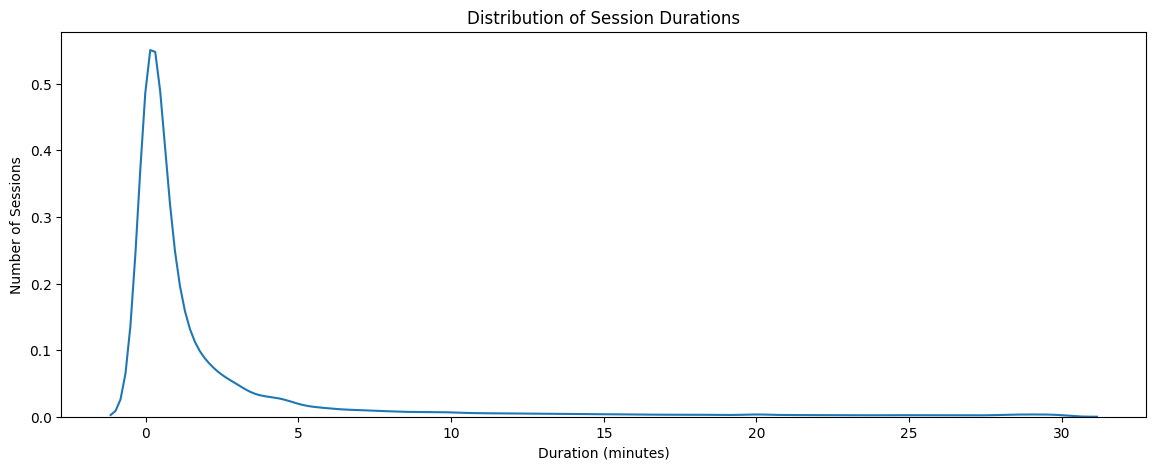

In [21]:
plt.figure(figsize=(14, 5))
sns.kdeplot(full_df['duration'])  # duration in minutes
plt.title('Distribution of Session Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Sessions')
plt.show()

The majority of sessions are quite short (less than 1 minute) due to the 10 websites limit.

**Analyse class imbalances**

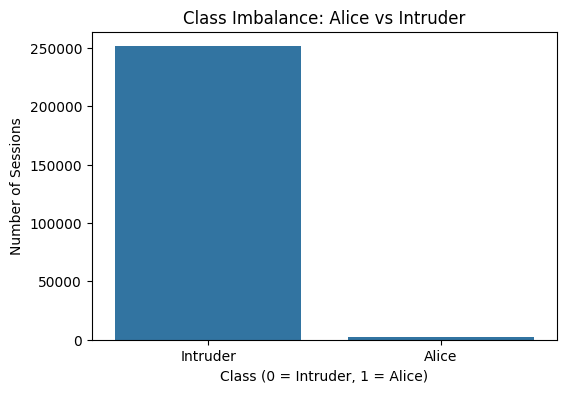

In [22]:
plt.figure(figsize=(6, 4))
#New instance of train_df as we removed the target earlier.
sns.countplot(x='target', data=pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv')))
plt.title('Class Imbalance: Alice vs Intruder')
plt.xlabel('Class (0 = Intruder, 1 = Alice)')
plt.ylabel('Number of Sessions')
plt.xticks([0, 1], ['Intruder', 'Alice'])
plt.show()

In [23]:
train_df_full = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'))
alice_percentage = (train_df_full['target'] == 1).mean() * 100
print(f"Percentage of sessions belonging to Alice: {alice_percentage:.2f}%")

Percentage of sessions belonging to Alice: 0.91%


The dataset is highly imbalanced, where an overwhelming majority of session do not belong to Alice (less than 1%). Such imbalance can affect model training, as models may become biased toward predicting the majority class. As a result, techniques such as oversampling may be used to ensure the model generalizes well.

**Alice vs. Intruder EDA**

First, we retrieve the train dataset with the target.

In [24]:
train_df_full = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'))

In [25]:
train_df_full.head(10)

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0
5,6,570,2014-03-18 15:18:31,21.0,2014-03-18 15:18:39,570.0,2014-03-18 15:23:02,21.0,2014-03-18 15:23:43,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,7,803,2014-02-13 16:45:35,23.0,2014-02-13 16:45:35,5956.0,2014-02-13 16:45:35,17513.0,2014-02-13 16:45:35,37.0,...,2014-02-13 16:47:14,803.0,2014-02-13 16:47:14,17514.0,2014-02-13 16:47:15,17514.0,2014-02-13 16:47:16,17514.0,2014-02-13 16:47:17,0
7,8,22,2013-04-12 10:27:26,21.0,2013-04-12 10:27:26,29.0,2013-04-12 10:27:28,5041.0,2013-04-12 10:27:29,14422.0,...,2013-04-12 10:27:29,21.0,2013-04-12 10:27:29,5041.0,2013-04-12 10:27:31,14421.0,2013-04-12 10:27:31,14421.0,2013-04-12 10:27:32,0
8,9,668,2014-03-17 16:23:08,940.0,2014-03-17 16:23:35,942.0,2014-03-17 16:23:35,941.0,2014-03-17 16:23:35,941.0,...,2014-03-17 16:23:36,940.0,2014-03-17 16:23:36,23.0,2014-03-17 16:23:52,21.0,2014-03-17 16:23:52,22.0,2014-03-17 16:23:53,0
9,10,3700,2014-02-20 16:09:13,229.0,2014-02-20 16:10:08,570.0,2014-02-20 16:10:08,21.0,2014-02-20 16:10:08,229.0,...,2014-02-20 16:10:24,21.0,2014-02-20 16:10:29,21.0,2014-02-20 16:10:39,2336.0,2014-02-20 16:10:40,2044.0,2014-02-20 16:10:40,0


Replicate the preprocessing steps done previously.

In [26]:
train_df_full[times_cols] = train_df_full[times_cols].apply(pd.to_datetime)
train_df_full.head(10)

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,NaN,NaT,NaN,NaT,NaN,NaT,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0
5,6,570,2014-03-18 15:18:31,21.0,2014-03-18 15:18:39,570.0,2014-03-18 15:23:02,21.0,2014-03-18 15:23:43,21.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
6,7,803,2014-02-13 16:45:35,23.0,2014-02-13 16:45:35,5956.0,2014-02-13 16:45:35,17513.0,2014-02-13 16:45:35,37.0,...,2014-02-13 16:47:14,803.0,2014-02-13 16:47:14,17514.0,2014-02-13 16:47:15,17514.0,2014-02-13 16:47:16,17514.0,2014-02-13 16:47:17,0
7,8,22,2013-04-12 10:27:26,21.0,2013-04-12 10:27:26,29.0,2013-04-12 10:27:28,5041.0,2013-04-12 10:27:29,14422.0,...,2013-04-12 10:27:29,21.0,2013-04-12 10:27:29,5041.0,2013-04-12 10:27:31,14421.0,2013-04-12 10:27:31,14421.0,2013-04-12 10:27:32,0
8,9,668,2014-03-17 16:23:08,940.0,2014-03-17 16:23:35,942.0,2014-03-17 16:23:35,941.0,2014-03-17 16:23:35,941.0,...,2014-03-17 16:23:36,940.0,2014-03-17 16:23:36,23.0,2014-03-17 16:23:52,21.0,2014-03-17 16:23:52,22.0,2014-03-17 16:23:53,0
9,10,3700,2014-02-20 16:09:13,229.0,2014-02-20 16:10:08,570.0,2014-02-20 16:10:08,21.0,2014-02-20 16:10:08,229.0,...,2014-02-20 16:10:24,21.0,2014-02-20 16:10:29,21.0,2014-02-20 16:10:39,2336.0,2014-02-20 16:10:40,2044.0,2014-02-20 16:10:40,0


In [27]:
for site_col in sites_cols:
    train_df_full[site_col] = train_df_full[site_col].map(sites_dict['site'])
train_df_full.head(10)

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,rr.office.microsoft.com,2014-02-20 10:02:45,NaN,NaT,NaN,NaT,NaN,NaT,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
1,2,maps.google.com,2014-02-22 11:19:50,mts0.google.com,2014-02-22 11:19:50,khms0.google.com,2014-02-22 11:19:51,mts0.google.com,2014-02-22 11:19:51,mts1.google.com,...,2014-02-22 11:19:51,khms0.google.com,2014-02-22 11:19:52,khms1.google.com,2014-02-22 11:19:52,193.164.197.30,2014-02-22 11:20:15,193.164.196.60,2014-02-22 11:20:16,0
2,3,cbk1.googleapis.com,2013-12-16 16:40:17,accounts.google.com,2013-12-16 16:40:18,cbk0.googleapis.com,2013-12-16 16:40:19,cbk1.googleapis.com,2013-12-16 16:40:19,twitter.com,...,2013-12-16 16:40:19,cbk0.googleapis.com,2013-12-16 16:40:20,cbk0.googleapis.com,2013-12-16 16:40:21,cbk0.googleapis.com,2013-12-16 16:40:22,cbk0.googleapis.com,2013-12-16 16:40:24,0
3,4,annotathon.org,2014-03-28 10:52:12,annotathon.org,2014-03-28 10:52:42,annotathon.org,2014-03-28 10:53:12,annotathon.org,2014-03-28 10:53:42,annotathon.org,...,2014-03-28 10:54:42,annotathon.org,2014-03-28 10:55:12,annotathon.org,2014-03-28 10:55:42,annotathon.org,2014-03-28 10:56:12,annotathon.org,2014-03-28 10:56:42,0
4,5,apis.google.com,2014-02-28 10:53:05,fr.wikipedia.org,2014-02-28 10:55:22,bits.wikimedia.org,2014-02-28 10:55:22,meta.wikimedia.org,2014-02-28 10:55:23,fr.wikipedia.org,...,2014-02-28 10:55:59,bits.wikimedia.org,2014-02-28 10:55:59,fr.wikipedia.org,2014-02-28 10:55:59,fr.wikipedia.org,2014-02-28 10:57:06,meta.wikimedia.org,2014-02-28 10:57:11,0
5,6,plus.google.com,2014-03-18 15:18:31,www.google.fr,2014-03-18 15:18:39,plus.google.com,2014-03-18 15:23:02,www.google.fr,2014-03-18 15:23:43,www.google.fr,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
6,7,translate.google.com,2014-02-13 16:45:35,www.google.com,2014-02-13 16:45:35,search.twitter.com,2014-02-13 16:45:35,html5doctor.com,2014-02-13 16:45:35,twitter.com,...,2014-02-13 16:47:14,translate.google.com,2014-02-13 16:47:14,www.designvegetal.com,2014-02-13 16:47:15,www.designvegetal.com,2014-02-13 16:47:16,www.designvegetal.com,2014-02-13 16:47:17,0
7,8,apis.google.com,2013-04-12 10:27:26,www.google.fr,2013-04-12 10:27:26,www.facebook.com,2013-04-12 10:27:28,i1.ztat.net,2013-04-12 10:27:29,track.zalando.fr,...,2013-04-12 10:27:29,www.google.fr,2013-04-12 10:27:29,i1.ztat.net,2013-04-12 10:27:31,i2.ztat.net,2013-04-12 10:27:31,i2.ztat.net,2013-04-12 10:27:32,0
8,9,cbks0.google.com,2014-03-17 16:23:08,maps.google.fr,2014-03-17 16:23:35,mts1.google.com,2014-03-17 16:23:35,mts0.google.com,2014-03-17 16:23:35,mts0.google.com,...,2014-03-17 16:23:36,maps.google.fr,2014-03-17 16:23:36,www.google.com,2014-03-17 16:23:52,www.google.fr,2014-03-17 16:23:52,apis.google.com,2014-03-17 16:23:53,0
9,10,ec.gc.ca,2014-02-20 16:09:13,clients1.google.fr,2014-02-20 16:10:08,plus.google.com,2014-02-20 16:10:08,www.google.fr,2014-02-20 16:10:08,clients1.google.fr,...,2014-02-20 16:10:24,www.google.fr,2014-02-20 16:10:29,www.google.fr,2014-02-20 16:10:39,7pgom5c1ao.s.ad6media.fr,2014-02-20 16:10:40,f5a9bmz6g6.s.ad6media.fr,2014-02-20 16:10:40,0


Create temporal features from the train dataset.

In [28]:
# Vectorized and optimized feature engineering for session EDA

eda_df = pd.DataFrame(index=train_df_full.index)

# Vectorized min/max for timestamps
min_times = train_df_full[times_cols].min(axis=1)
max_times = train_df_full[times_cols].max(axis=1)
eda_df['min'] = min_times
eda_df['max'] = max_times

# Session duration in minutes
eda_df['minutes'] = ((max_times - min_times).dt.total_seconds() / 60).round(2)

# Temporal features (vectorized)
eda_df['start_month'] = min_times.dt.year * 100 + min_times.dt.month
eda_df['year'] = min_times.dt.year
eda_df['month'] = min_times.dt.month
eda_df['start_week'] = min_times.dt.year * 100 + min_times.dt.isocalendar().week
eda_df['start_day'] = min_times.dt.dayofyear
eda_df['start_hour'] = min_times.dt.hour
eda_df['dow'] = min_times.dt.weekday
eda_df['is_weekend'] = min_times.dt.weekday.isin([5, 6]).astype(int)
eda_df['work_hours'] = (
    min_times.dt.weekday.isin([0, 1, 2, 3]) &
    (min_times.dt.hour >= 8) & (min_times.dt.hour <= 17) & (min_times.dt.hour != 12)
).astype(int)

# Number of unique sites visited within a session (vectorized)
eda_df['unique_sites'] = train_df_full[sites_cols].nunique(axis=1)

# Average time spent per site in a session (vectorized)
site_counts = train_df_full[sites_cols].nunique(axis=1)
session_seconds = (max_times - min_times).dt.total_seconds()
eda_df['avg_time_per_site'] = session_seconds.div(site_counts.where(site_counts > 0, np.nan)).fillna(0)

# Number of repeated site visits within a session (vectorized)
eda_df['repeated_site_visits'] = len(sites_cols) - train_df_full[sites_cols].nunique(axis=1)

# Add target column
eda_df['target'] = train_df_full['target']

eda_df.head()

,min,max,minutes,start_month,year,month,start_week,start_day,start_hour,dow,is_weekend,work_hours,unique_sites,avg_time_per_site,repeated_site_visits,target
0,2014-02-20 10:02:45,2014-02-20 10:02:45,0.00,201402,2014,2,201408,51,10,3,0,1,1,0.000000,9,0
1,2014-02-22 11:19:50,2014-02-22 11:20:16,0.43,201402,2014,2,201408,53,11,5,1,0,7,3.714286,3,0
2,2013-12-16 16:40:17,2013-12-16 16:40:24,0.12,201312,2013,12,201351,350,16,0,0,1,4,1.750000,6,0
3,2014-03-28 10:52:12,2014-03-28 10:56:42,4.50,201403,2014,3,201413,87,10,4,0,0,1,270.000000,9,0
4,2014-02-28 10:53:05,2014-02-28 10:57:11,4.10,201402,2014,2,201409,59,10,4,0,0,4,61.500000,6,0


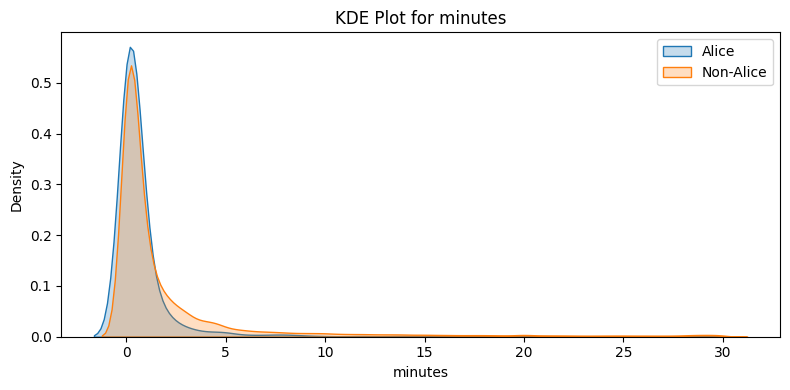

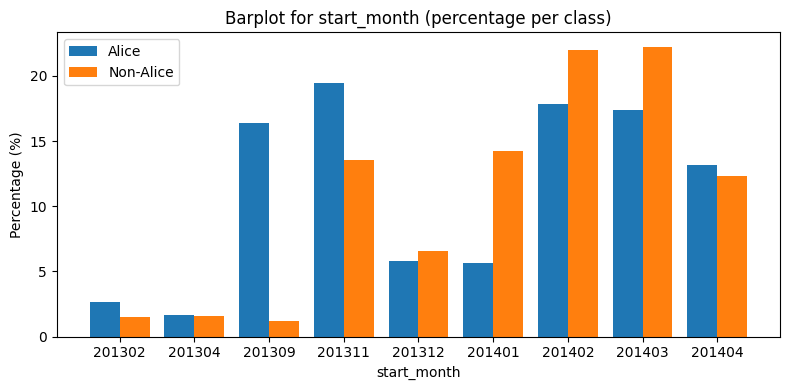

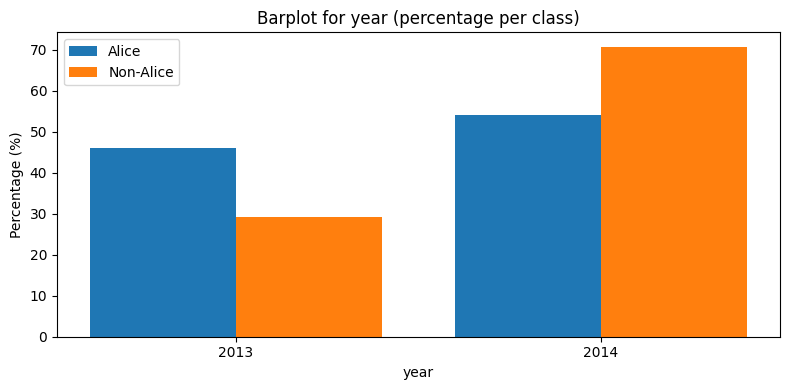

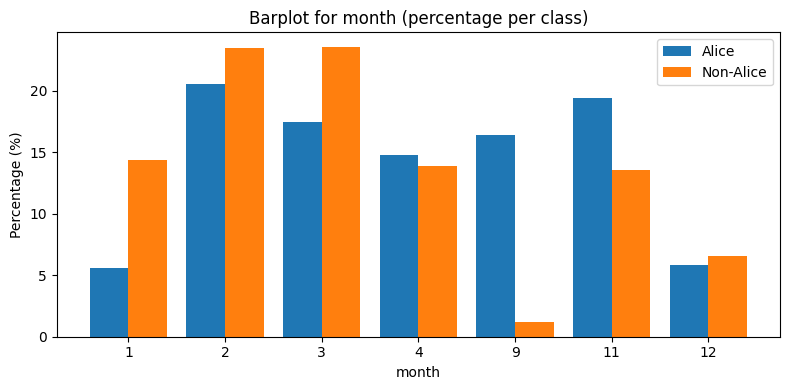

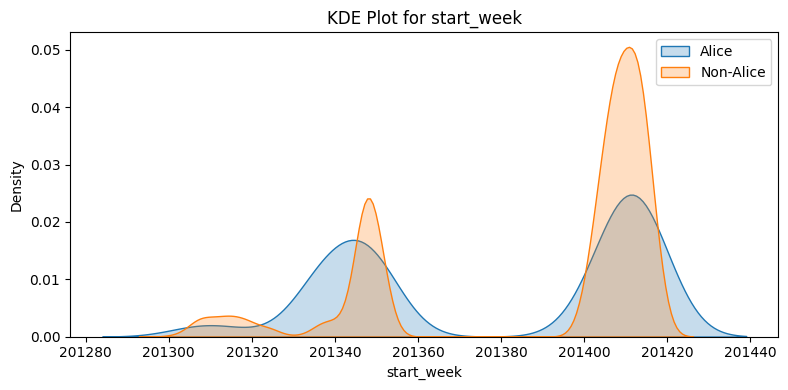

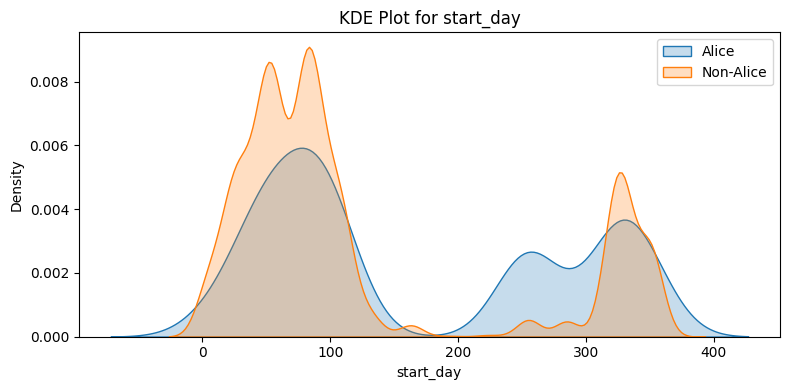

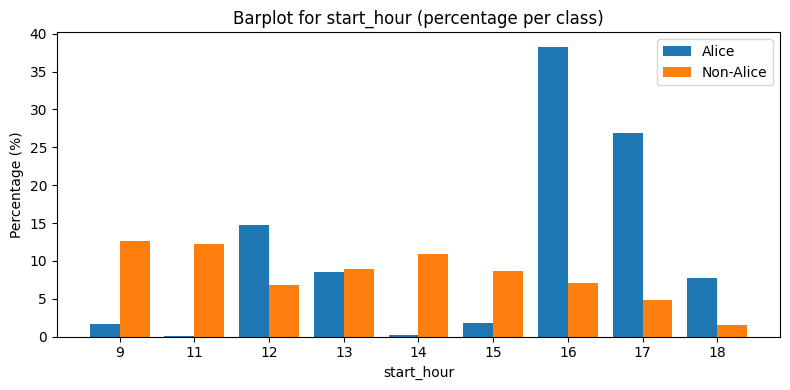

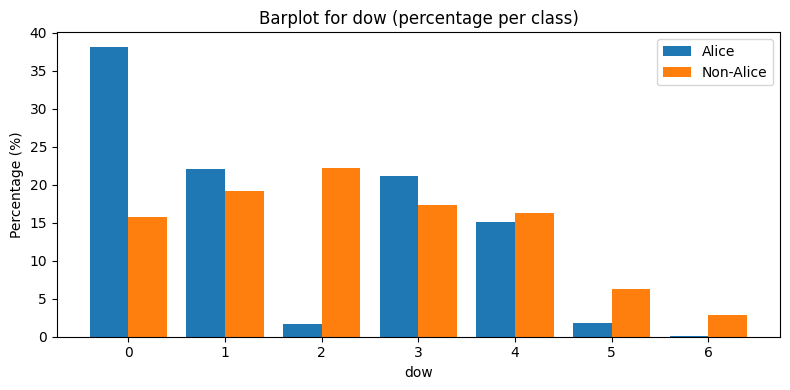

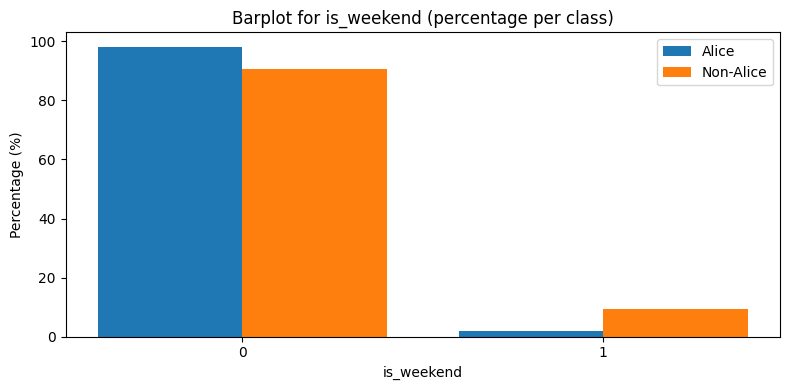

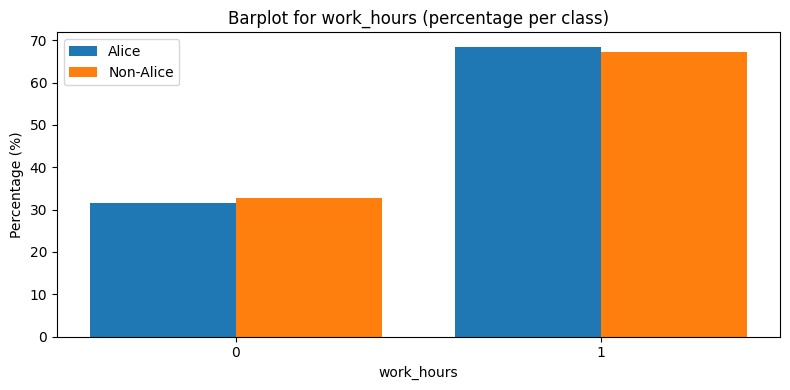

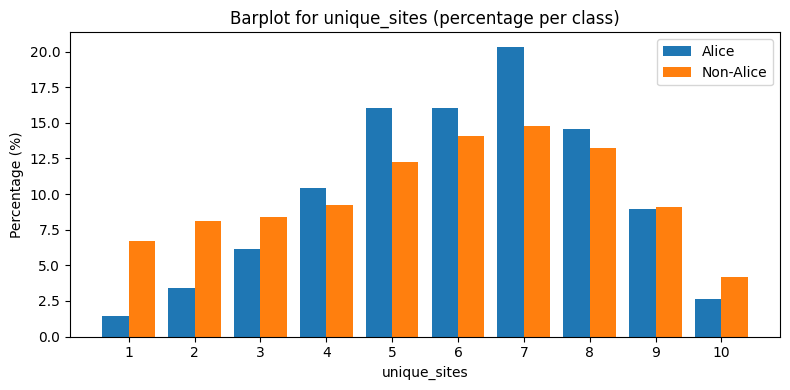

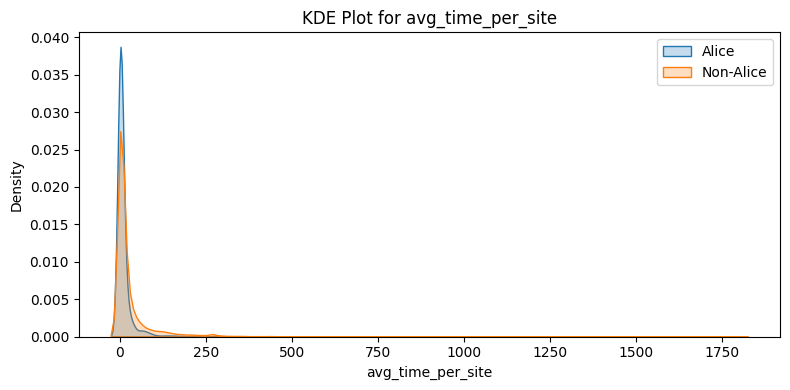

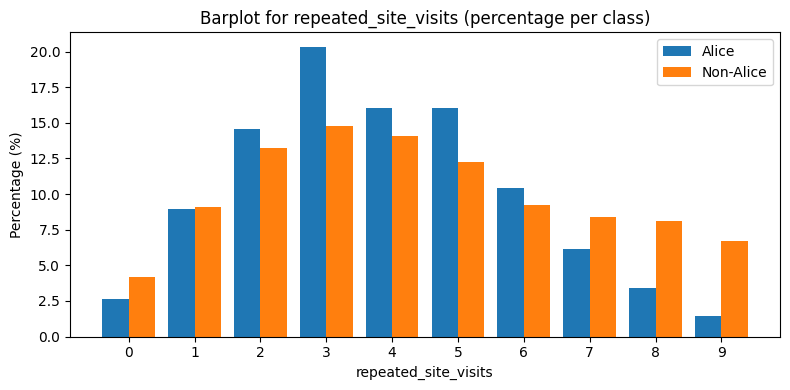

In [29]:
# Plot barplots for discrete variables and KDE plots for continuous variables.
# Use percentages over the total counts for each class due to class imbalances.

exclude_cols = ['min', 'max', 'target']
plot_cols = [col for col in eda_df.columns if col not in exclude_cols]

# Identify discrete and continuous columns
discrete_cols = []
continuous_cols = []
for col in plot_cols:
    n_unique = eda_df[col].nunique()
    if pd.api.types.is_integer_dtype(eda_df[col]) and n_unique < 20:
        discrete_cols.append(col)
    elif pd.api.types.is_bool_dtype(eda_df[col]):
        discrete_cols.append(col)
    else:
        continuous_cols.append(col)

for col in plot_cols:
    plt.figure(figsize=(8, 4))
    if col in discrete_cols:
        # Calculate value counts as percentages for each class
        alice_counts = eda_df[eda_df['target'] == 1][col].value_counts(normalize=True).sort_index() * 100
        nonalice_counts = eda_df[eda_df['target'] == 0][col].value_counts(normalize=True).sort_index() * 100
        width = 0.4
        idx = np.arange(len(alice_counts.index))
        # Bar plot for discrete variables
        plt.bar(idx - width/2, alice_counts.values, width=width, label='Alice')
        plt.bar(idx + width/2, nonalice_counts.reindex(alice_counts.index, fill_value=0).values, width=width, label='Non-Alice')
        plt.xticks(idx, alice_counts.index)
        plt.xlabel(col)
        plt.ylabel('Percentage (%)')
        plt.title(f'Barplot for {col} (percentage per class)')
        plt.legend()
    else:
        # KDE plot for continuous variables
        sns.kdeplot(eda_df[eda_df['target'] == 1][col], label='Alice', fill=True, common_norm=False)
        sns.kdeplot(eda_df[eda_df['target'] == 0][col], label='Non-Alice', fill=True, common_norm=False)
        plt.title(f'KDE Plot for {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
    plt.tight_layout()
    plt.show()

**Analysis**

We analyse the distributions for each plot, for each engineered features from session data. 
1. Minutes
- Alice and Intruder observes roughly the same session durations (in minutes). Alice's sessions tend to be slightly longer.
2. Start Months 
- Intruder's sessions are bimodally distributed, while Alice's sessions are negatively skewed to month. There are lapses in activity for both Alice and Intruder.
3. Yearly
- There is a larger percentage of Intruder's sessions in 2013 compare to that of Alice. It is vice versa in 2014.
4. Monthly
- Both classes have the highest session activity in February and March. Alice sees relatively higher session activity between February to November, while Intruder has more sessions concentrated in the early months (January to April). 
5. Start Week (*)
- Intruder's sessions are clustered around the 45th week of 2013 and the 5th week of 2014. In contrast, Alice's sessions are more evenly distributed around these same periods.
6. Start Day (*)
- Intruder's sessions show narrow peaks early in the year, around days 30–100 and day 330. On the other hand, Alice's sessions are more evenly spread throughout the year, with two broader peaks around days 80 and 330.
7. Start Hour (*)
- Intruder's activity is spread evenly throughout the day, while Alice's activity is more concentrated in the evening (18:00 onwards).
8. Day of Week (*)
- Intruder's sessions are more evenly spread out through the week, while Alice's sessions peaked on Monday, and moderate on Tuesday, Thursday and Friday.
9. Weekend (*)
- Alice is largely non-active during weekends, while Intruder observes slight activity.
10. Work Hours
- Roughly the same for both Alice and Intruder.
11. Unique Sites per Session (*)
- There is less of a noticeable trend for Intruder, with a restrained peak of 6-8 sites. Contrastingly, Alice witness a significant peak of 7 sites, with 5, 6 and 8 slightly behind.
11. Average Time per Site 
- Generally quite similar, though Intruder stays noticably shorter on the lower end of the distribution.
12. Repeated Site Visits per Session (*)
- There is less of a noticeable trend for Intruder, with a restrained peak of 2-4 repeats. Contrastingly, Alice witness a significant peak of 3 repeats, with 2, 4 and 5 slightly behind.

**Conclusion**

Generally, trends are more distinct for Alice as an individual with noticable patterns of bahaviours. Intruders, as a group, observe less of such patterns. Consequently, a classification model should take into account the various proposed features above, which isolated such differences.

In [30]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   min                   253561 non-null  datetime64[ns]
 1   max                   253561 non-null  datetime64[ns]
 2   minutes               253561 non-null  float64       
 3   start_month           253561 non-null  int32         
 4   year                  253561 non-null  int32         
 5   month                 253561 non-null  int32         
 6   start_week            253561 non-null  Int64         
 7   start_day             253561 non-null  int32         
 8   start_hour            253561 non-null  int32         
 9   dow                   253561 non-null  int32         
 10  is_weekend            253561 non-null  int64         
 11  work_hours            253561 non-null  int64         
 12  unique_sites          253561 non-null  int64         
 13 